In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline                               
from glob import glob
from PIL import Image


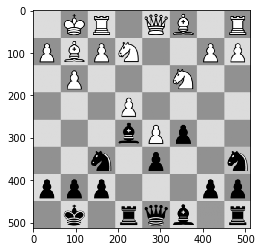

(513, 512)

In [2]:
img = cv2.imread('chess.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGRA2GRAY)

plt.imshow(gray, cmap="gray", vmin=0, vmax=255)
plt.show()

gray.shape

In [8]:
def split_images(img_arr):
    bw, bh = img_arr.shape
    cw, ch = get_square_dims(bw, bh)
    ovx, ovy = get_overlap(cw, ch, 0.1)
    print(cw, ch, ovx, ovy)
    img_arr = slide_windows(img_arr, cw, ch, ovx, ovy)
    return img_arr

def get_overlap(cw, ch, ratio):
    import math
    return math.ceil(cw * ratio), math.ceil(ch * ratio)

def get_square_dims(bw, bh):
    import math
    _cw, _ch = bw/8.0, bh/8.0
    return math.floor(_cw), math.floor(_ch)


def size_window(a, b, mx):
    if a < 0:
        _del = 0 - a
        a = 0
        b += _del
    if b > mx:
        _del = b - mx
        b = mx
        a -= _del
    return a, b
        

def slide_windows(arr, bw, bh, ovx, ovy):
    mx, my = arr.shape
    res = []
    for i in range(8):
        for j in range(8):
            a, b, c, d = i * bw, (i+1) * bw, j * bh, (j+1) * bh
#             a, b, c, d = a - ovx, b + ovx, c - ovy, d + ovy
#             a, b = size_window(a, b, mx)
#             c, d = size_window(c, d, my)
#             print(a, b, c, d)
            mat = arr[c:d,a:b]
            res.append(mat)
    return np.array(res)


In [9]:
b = split_images(gray)

64 64 7 7


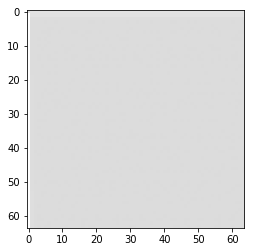

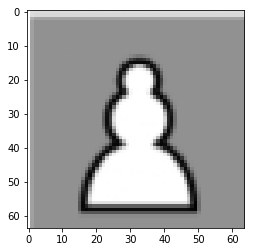

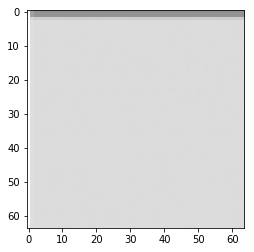

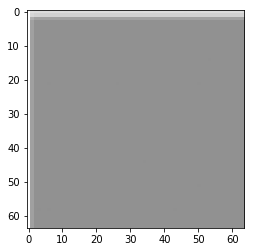

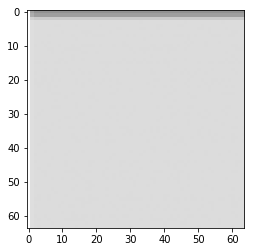

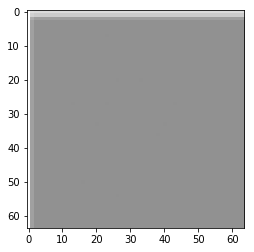

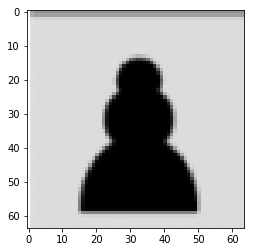

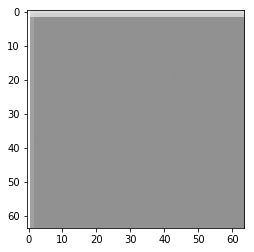

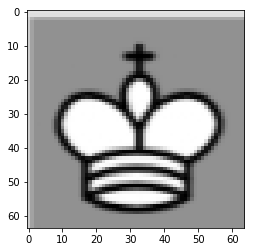

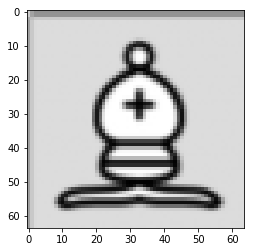

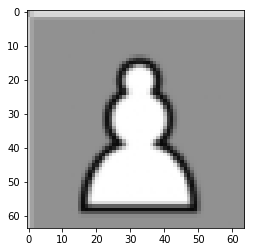

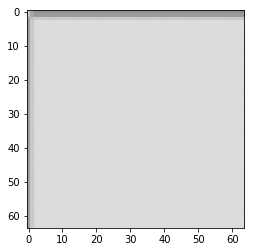

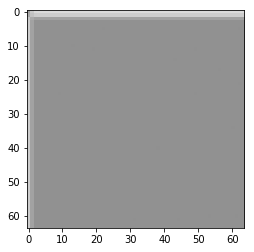

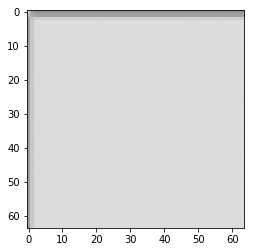

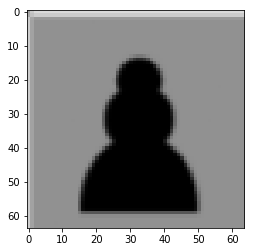

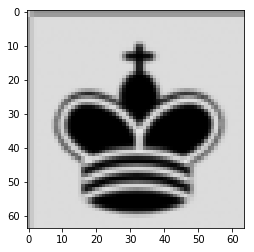

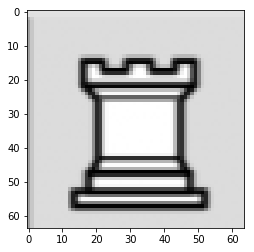

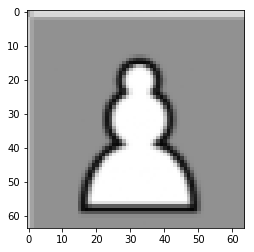

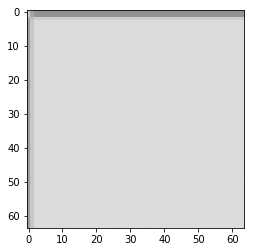

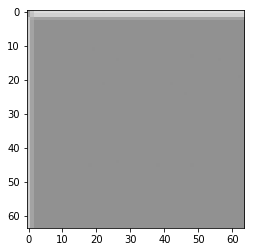

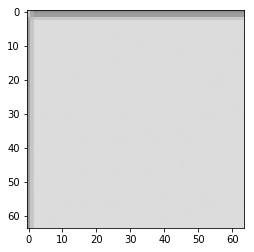

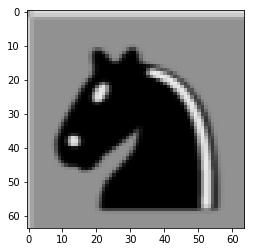

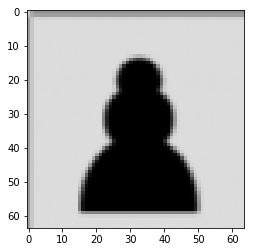

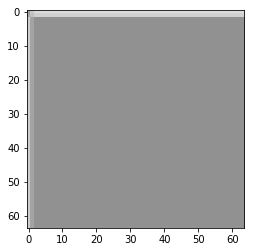

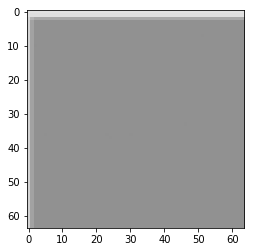

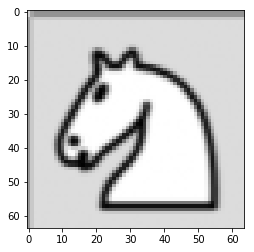

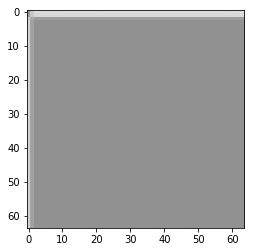

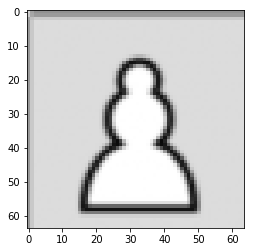

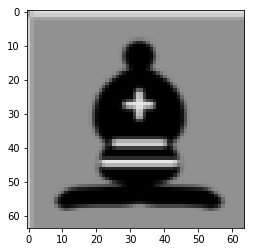

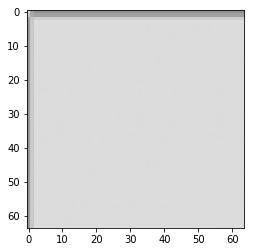

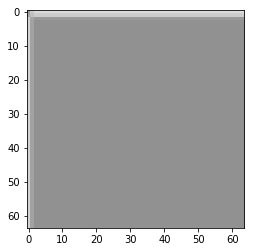

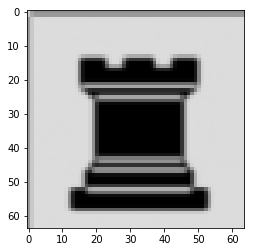

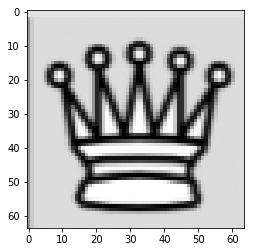

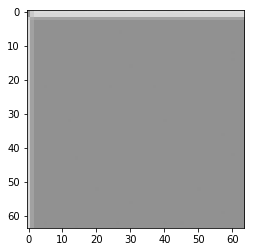

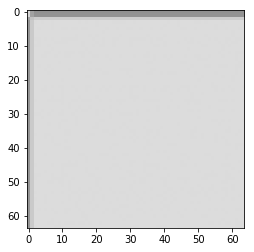

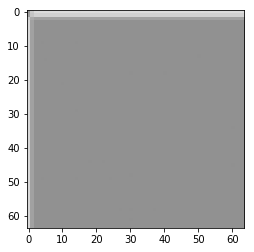

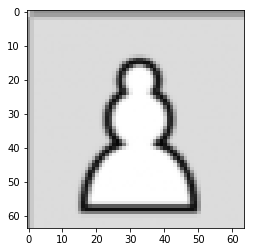

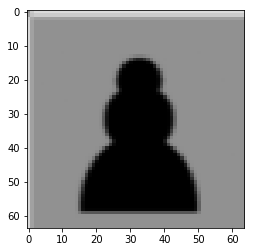

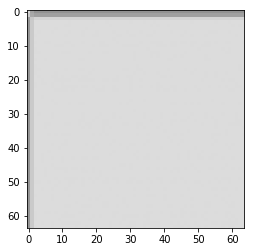

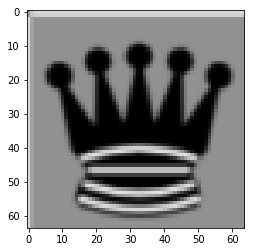

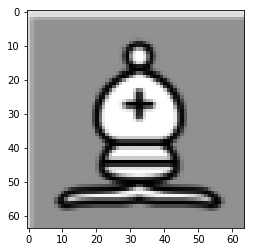

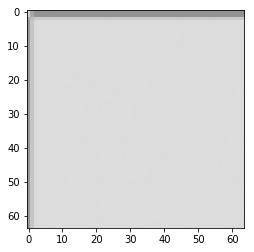

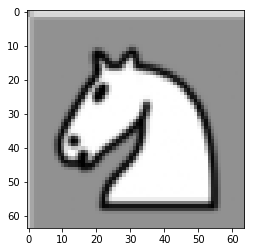

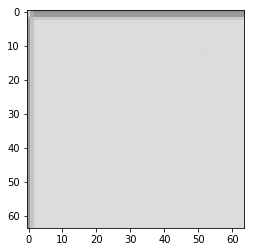

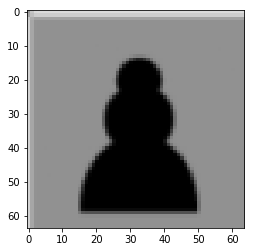

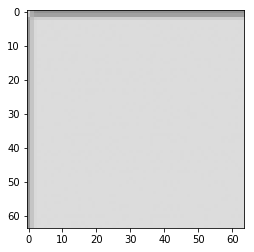

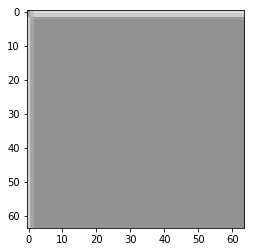

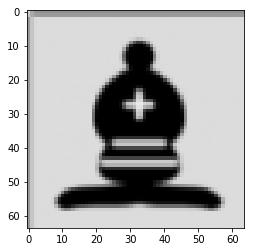

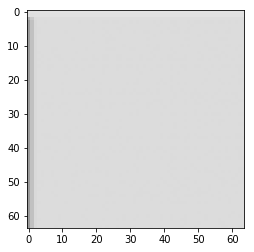

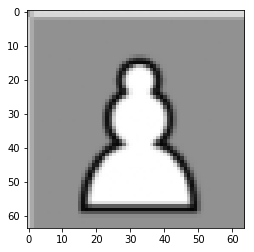

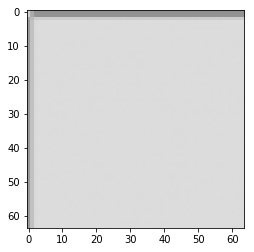

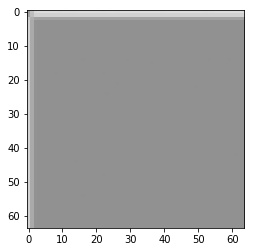

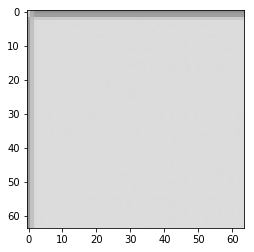

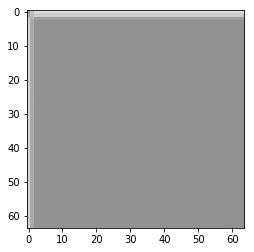

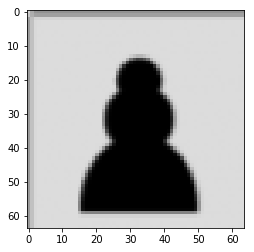

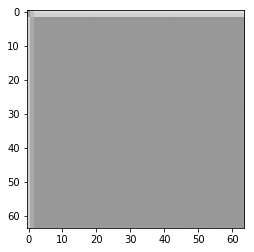

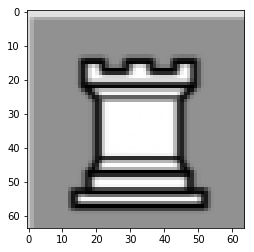

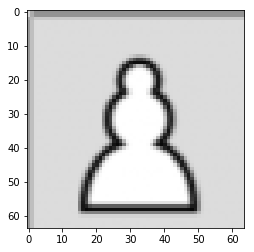

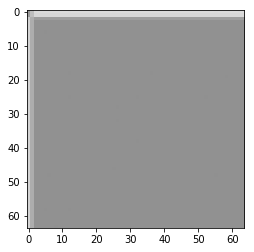

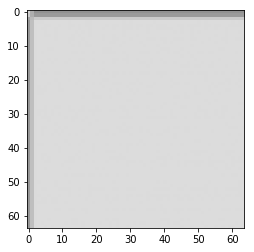

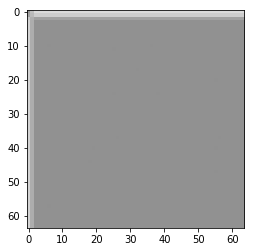

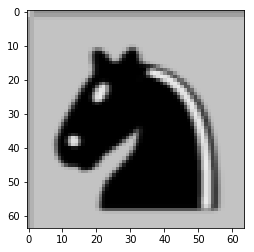

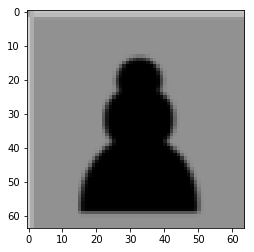

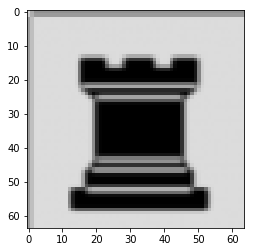

In [7]:
for img in b:
    plt.imshow(img, cmap="gray", vmin=0, vmax=255)
    plt.show()

In [79]:
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline                               

from glob import glob
from keras.backend.tensorflow_backend import set_session
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, ZeroPadding2D, AveragePooling2D, GlobalMaxPooling2D
from keras.layers import Dropout, Flatten, Dense, BatchNormalization
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator, image
from keras.optimizers import SGD

Using TensorFlow backend.


In [83]:
### TODO: Define your architecture.
model = Sequential()
model.add(ZeroPadding2D((1, 1), input_shape=(256, 256, 1)))

# Layer 1
model.add(BatchNormalization())
model.add(Conv2D(16, (2, 2), activation='elu'))
model.add(BatchNormalization())
model.add(Conv2D(16, (2, 2), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(16, (2, 2), activation='tanh'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.15))

# Layer 2
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='tanh'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.15))

# Layer 3
model.add(BatchNormalization())
model.add(Conv2D(64, (4, 4), activation='elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (4, 4), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.15))

# Layer 4
model.add(BatchNormalization())
model.add(Conv2D(128, (5, 5), activation='elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (5, 5), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.15))

# # Layer 5
# model.add(BatchNormalization())
# model.add(Conv2D(64, (6, 6), activation='elu'))
# model.add(BatchNormalization())
# model.add(Conv2D(64, (6, 6), activation='elu'))
# model.add(BatchNormalization())
# model.add(Conv2D(64, (6, 6), activation='elu'))

# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.15))


# model.add(Flatten())
model.add(GlobalAveragePooling2D())
model.add(BatchNormalization())
model.add(Dense(1024, activation='elu'))
model.add(BatchNormalization())
model.add(Dense(6, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_3 (ZeroPaddin (None, 258, 258, 1)       0         
_________________________________________________________________
batch_normalization_24 (Batc (None, 258, 258, 1)       4         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 257, 257, 16)      80        
_________________________________________________________________
batch_normalization_25 (Batc (None, 257, 257, 16)      64        
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 256, 256, 16)      1040      
_________________________________________________________________
batch_normalization_26 (Batc (None, 256, 256, 16)      64        
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 255, 255, 16)      1040      
__________

In [39]:
images = glob('data/chess_boards/*')

In [40]:
count = 99
for img in images:
    _i = 1
    print(img)
    img = cv2.imread(img)
    gray = cv2.cvtColor(img, cv2.COLOR_BGRA2GRAY)
    for i in split_images(gray):
        i = Image.fromarray(i)
#         if _i in (1, 8, 57, 64):
#             i.save('data/split/ROOK/{}.jpg'.format(count))
#         elif _i in (2, 7, 58, 63):
#             i.save('data/split/PAWN/{}.jpg'.format(count))
#         elif _i in (9, 16, 49, 56):
#             i.save('data/split/KNIGHT/{}.jpg'.format(count))
#         elif _i in (17, 24, 41, 48):
#             i.save('data/split/BISHOP/{}.jpg'.format(count))
#         elif _i in (25, 32):
#             i.save('data/split/KING/{}.jpg'.format(count))
#         elif _i in (33, 40):
#             i.save('data/split/QUEEN/{}.jpg'.format(count))
#         else:
#             pass
        if _i in (26, 31):
            i.save('data/chess_boards/QUEEN/{}.jpg'.format(count))
        elif _i in (34, 39):
            i.save('data/chess_boards/KING/{}.jpg'.format(count))
        count += 1
        _i += 1
    _i = 0

data/chess_boards/chessh.jpg
96 96 10 10
data/chess_boards/chesse.jpg
96 96 10 10
data/chess_boards/chessl.jpg
96 96 10 10
data/chess_boards/chessa.jpg
96 96 10 10
data/chess_boards/chessg.jpg
96 96 10 10
data/chess_boards/chessm.jpg
96 96 10 10
data/chess_boards/chessj.jpg
96 96 10 10
data/chess_boards/QUEEN


error: /io/opencv/modules/imgproc/src/color.cpp:9748: error: (-215) scn == 3 || scn == 4 in function cvtColor
